In [1]:
#these examples are taken from hands on machine learning book chapter 4

In [1]:
#normal equation inv((X.T . X)) . X.T . y

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

Text(0, 0.5, 'y')

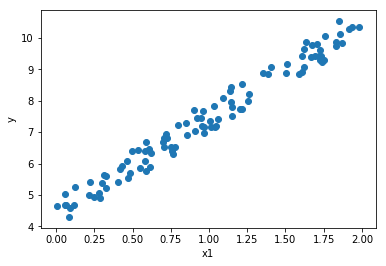

In [5]:
plt.scatter(X, y)
plt.xlabel('x1')
plt.ylabel('y')

In [6]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance of X

In [7]:
temp = np.dot(X_b.T, y)
theta_best = np.dot(inv(np.dot(X_b.T, X_b)), temp)


In [8]:
theta_best

array([[4.46504599],
       [2.99486316]])

In [9]:
y.shape

(100, 1)

In [10]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.46504599],
       [10.45477232]])

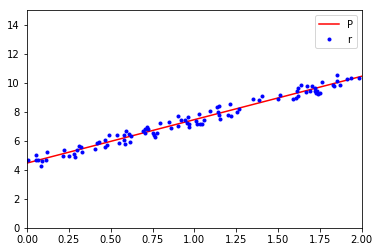

In [11]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend('Prediction')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_

array([4.46504599])

In [14]:
lin_reg.coef_

array([[2.99486316]])

In [15]:
lin_reg.predict(X_new)

array([[ 4.65572892],
       [10.5006835 ]])

In [16]:
#training a model using gradient descent

In [17]:
#when you using gradient descent, you should ensure that all features have a similar scale

In [18]:
#Batch Gradient descent 

In [20]:
learning_rate = 0.1
n_iteration = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iteration):
    cost = np.sum(1/m*np.dot(X_b, theta) - y)
    print(cost)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

-740.0132435930642
-736.9838833958864
-735.2456478686248
-734.2485440802377
-733.6768563886578
-733.3493529597982
-733.1620006199174
-733.0550810631609
-732.9943143392563
-732.9600230379596
-732.9409121307363
-732.9304983703653
-732.9250606347434
-732.9224633488913
-732.9214810861149
-732.9214108645256
-732.9218495913169
-732.9225663079533
-732.9234288545706
-732.9243617730102
-732.925322141968
-732.9262857058341
-732.9272389124759
-732.9281743429692
-732.9290880884171
-732.9299782444631
-732.9308440473928
-732.9316853785195
-732.9325024799726
-732.9332957918288
-732.9340658588907
-732.9348132774364
-732.9355386649103
-732.9362426427687
-732.9369258268758
-732.9375888222238
-732.9382322201263
-732.9388565968305
-732.9394625129321
-732.9400505132463
-732.9406211269352
-732.9411748677755
-732.941712234503
-732.9422337111914
-732.9427397676498
-732.9432308598239
-732.9437074301925
-732.9441699081597
-732.9446187104379
-732.9450542414191
-732.9454768935402
-732.9458870476337
-732.946285073

-732.9593472791466
-732.9593472791745
-732.9593472792012
-732.9593472792276
-732.9593472792528
-732.9593472792776
-732.9593472793013
-732.9593472793246
-732.959347279347
-732.9593472793688
-732.95934727939
-732.9593472794106
-732.9593472794305
-732.9593472794498
-732.9593472794687
-732.9593472794867
-732.9593472795045
-732.9593472795217
-732.9593472795384
-732.9593472795544
-732.9593472795702
-732.9593472795854
-732.9593472796003
-732.9593472796146
-732.9593472796284
-732.9593472796421
-732.959347279655
-732.9593472796678
-732.9593472796798
-732.9593472796922
-732.9593472797036
-732.959347279715
-732.9593472797259
-732.9593472797366
-732.9593472797467
-732.9593472797568
-732.9593472797663
-732.9593472797759
-732.9593472797851
-732.959347279794
-732.9593472798026
-732.959347279811
-732.959347279819
-732.9593472798268
-732.9593472798344
-732.959347279842
-732.9593472798491
-732.959347279856
-732.959347279863
-732.9593472798696
-732.9593472798758
-732.959347279882
-732.959347279888
-732.9

In [19]:
theta
y_hat = theta.T.dot(X_new)
print(y_hat)

[[5.98972633]]


In [21]:
#stochastic gradient descent

In [22]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters
def learning_schedule(t):
    return t0/(t0+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients

In [23]:
theta

array([[4.7223699 ],
       [2.97362026]])

In [24]:
from sklearn.linear_model import SGDRegressor

In [25]:
sgd_reg = SGDRegressor(max_iter=100, penalty=None, eta0=0.1, tol=0.000001)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.64037824]), array([2.92373669]))

In [26]:
#mini-batch gradient descent 

In [27]:
n_epochs = 50
n_split = 4
t0, t1 = 5, 50 #learning schedule hyperparameters
def learning_schedule(t):
    return t0/(t0+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(int(m/n_split)):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients

In [28]:
theta

array([[4.6893783 ],
       [3.01782936]])

In [29]:
#polynomial regression - a simple way to do this is add powers of each features as new features, then train a 
#                        train a linear model on this extended set of features

In [30]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

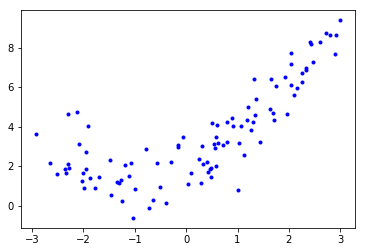

In [31]:
plt.plot(X, y, 'b.')

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.70123581])

In [34]:
X_poly[0]

array([-1.70123581,  2.89420329])

In [35]:
#X_poly now contains the original feature of X plus the square of this feature 

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([2.00550121]), array([[1.02679842, 0.49428486]]))

In [37]:
y_hat = [ 0.93*x + 0.46*(x**2)+2.21  for x in range(-20,20,1) ]

In [38]:
y_hat = np.array(y_hat)

In [39]:
y_hat = y_hat.reshape(40,1)

In [40]:
y_hat.shape

(40, 1)

In [41]:
counter = -20
X_new = []
for i in range(40):
    X_new.append(counter)
    counter +=1
X_new = np.array(X_new)
X_new = X_new.reshape(40,1)

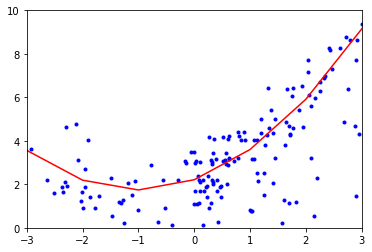

In [42]:
plt.plot(X_poly, y, 'b.')
plt.plot(X_new, y_hat, 'r')
plt.axis([-3,3,0,10])
plt.show()


In [43]:
#learning curves

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [45]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.legend('Training set')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend('Validation set')
    plt.xlabel('training set')
    plt.ylabel('rmse')


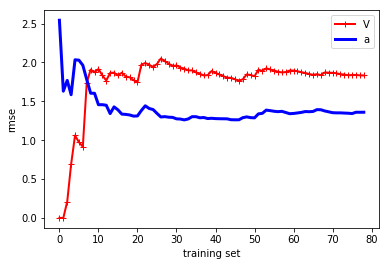

In [46]:
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

In [47]:
from sklearn.pipeline import Pipeline

In [48]:
polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=True)),
    ('lin_reg', LinearRegression())

))

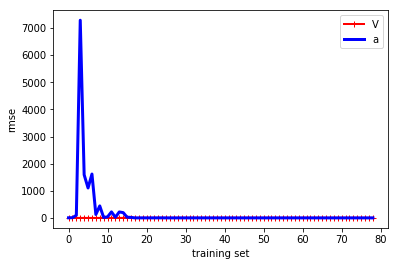

In [49]:
plot_learning_curve(polynomial_regression, X, y)

In [50]:
#regularized linear model

In [51]:
#Ridge Regression(Tikhonov regularization) the regularization term is ==> the squred summation of all thethas
#the regularization term only added to cost function only in the training phase 
#once the model is trained we evaluate the model's performance using unregularized performance measure

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
X.shape, y.shape
ridge_reg.predict([[1.5]])

array([[5.08287794]])

In [54]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.31357381])

In [55]:
#Lasso regression(least absolute shrinkage and selection operator regression)
#it uses l1 norm 
#lasso regression automatically performs feature selection and outputs a sparse model

In [56]:
from sklearn.linear_model import Lasso

In [57]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.04208796])

In [58]:
#Elastic Net regularization 
#it is a middle ground between ridge regression and lasso regression 
#the regularization term is a simple mix of both Ridge and Lasso's regularization term, and you can control the 
#mix ratio r
#When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

In [59]:
from sklearn.linear_model import ElasticNet

In [60]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.04107065])

In [61]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error

In [62]:
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, 
                      learning_rate='constant', eta0=0.0005)
minimum_value_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X, y)
    y_val_predict = sgd_reg.predict(X)
    val_error = mean_squared_error(y_val_predict, y)
    if val_error < minimum_value_error:
        minumum_value_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

In [63]:
#Note that with warm_start=True , when the fit() method is called, it just continues training where it left
#off instead of restarting from scratch.

In [64]:
from sklearn import datasets

In [65]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [66]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) #1 if Iris-Virginica, else 0

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

/home/tade/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

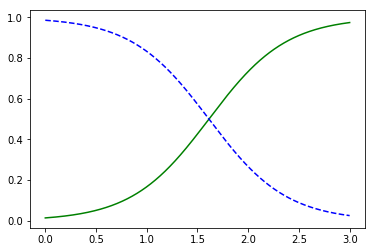

In [69]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Verginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris Verginica')
plt.show()

In [70]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [71]:
#Softmax Regression

In [72]:
X = iris["data"][:, (2, 3)]
y = iris["target"]
# petal length, petal width
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
softmax_reg.predict([[5, 2]])

array([2])

In [74]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])